In [1]:
%qtconsole

# First task, can we open up and edit design files programmatically?


From the file, `load_file2.py`, api example we see with some simple code we can load in a design file. Below is a modified version of this file to load a design file by name without a QT popup box. This script reprocesses the layer operations and then prints out the layer operations in order. 


In [11]:
import sys
import popupcad
import time
import os
from pprint import pprint 
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib qt4

# file to load and work with
myfolder  = '/Users/nickgravish/popupCAD_files/designs/'
myfile    = 'robobee_interference_hinge.cad'

d = popupcad.filetypes.design.Design.load_yaml(os.path.join(myfolder, myfile))
d.reprocessoperations(debugprint=True)

print('--------------------------- Operations ---------------------------')
for child in d.operations:
    print(child)


[hinge_footprint(SketchOp), GeometryForHinge(SketchOp), kapton_hing(SketchOp), Body(SketchOp), Body2(SketchOp), top_mount(SketchOp), SketchOp, LaminateOp, WithHinge(LaminateOp), KeyholeWingMount2(SketchOp), KeyholeWingMount1(SketchOp), KeyholeWingMount(LaminateOp), WithHinge2(LaminateOp), KeyholeWingMount3(LaminateOp), KaptonKeepout(SketchOp), CurrentHinge(LaminateOp), BottomHoles(SketchOp), AddBottomHoles(LaminateOp), TopHoles(SketchOp), CurrentHinge2(LaminateOp), BottomBracket(SketchOp), SizeBottomBracket(LaminateOp), BottomStops(SketchOp), BottomTeeth(LaminateOp), AddBottomBracket(LaminateOp), TopTeeth(SketchOp), FinalPart(LaminateOp), FinalePartWithKAKeepouts(LaminateOp), Cleanup, Support, SupportAreas(SketchOp), LaminateOp, LaminateOp, Web, FinalPart(LaminateOp), ReleaseCut(LaminateOp)]
--------------------------- Operations ---------------------------
hinge_footprint(SketchOp)
GeometryForHinge(SketchOp)
kapton_hing(SketchOp)
Body(SketchOp)
Body2(SketchOp)
top_mount(SketchOp)
Sket

/Users/nickgravish/anaconda/envs/popupcad_env1/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Next lets examine the contents of the design file 

First lets look at the sketches contained in this file

In [2]:
d.sketches

{4401826064: KaptonKeepOut,
 4672649360: TopMountGeometry,
 4679580048: BottomHoles,
 4707609552: TopStops,
 4709385616: BottomMountingBracket1,
 4709395600: RobobeeKeyhole,
 4709396752: TopHoles,
 4712379728: BottomRectangle,
 4747459792: footprint_2,
 4748049616: TopTeeth,
 4773848336: noah_hinge_length.sketch,
 5001353296: wing_attach_geometry,
 5039153104: Supports,
 5080763216: footprint_interference_hinge,
 5135001936: 5135001936.sketch,
 5153733840: body}

we see references are stored in a dict

In [3]:
d.sketches.keys()

dict_keys([5080763216, 4709395600, 5039153104, 4679580048, 4773848336, 5001353296, 4401826064, 4672649360, 5135001936, 4747459792, 4709396752, 4707609552, 4709385616, 4748049616, 4712379728, 5153733840])

In particular I will be interested in modifying the geometry in the top and bottom teeth sketches. We can access these through their dict key as follows.

In [4]:
topteeth_key = 4748049616
d.sketches[topteeth_key]

TopTeeth

We interact with sketch geometry through the 

```python
operationgeometry
```

function which returns a list of the geometric entities in the sketch. The list can contain simple vertices or more complex shape descriptors such as `GenericPoly` which is from the `genericshapes` class.  

In [5]:
# lets look at the geometry associated with the TopStops layer
pprint(d.sketches[topteeth_key].operationgeometry)

print('\n')

# second lets look into the GenergicPoly class
pprint(d.sketches[topteeth_key].operationgeometry[0].vertices())

 vertex4779487696(-1.198264211002016, 0.14816343490304706)]


[vertex4709941456(-2.14728564868934, -0.06485388108295956),
 vertex4822603664(-2.14728564868934, 0.397163434903047),
 vertex4827372368(-1.84728564868934, 0.397163434903047),
 vertex4810284752(-1.84728564868934, 0.147163434903047),
 vertex4810261904(-1.198264211002016, 0.147163434903047),
 vertex4822604112(-1.198264211002016, 0.397163434903047),
 vertex4810252432(-0.8982642110020161, 0.397163434903047),
 vertex4810281232(-0.8982642110020161, -0.05771551277843599)]


we can conver the vertex type to numpy digits

In [6]:
vertex_numbers = [v.getpos() for v in d.sketches[topteeth_key].operationgeometry[0].vertices()]

pprint(vertex_numbers)

[(-2.14728564868934, -0.06485388108295956),
 (-2.14728564868934, 0.397163434903047),
 (-1.84728564868934, 0.397163434903047),
 (-1.84728564868934, 0.147163434903047),
 (-1.198264211002016, 0.147163434903047),
 (-1.198264211002016, 0.397163434903047),
 (-0.8982642110020161, 0.397163434903047),
 (-0.8982642110020161, -0.05771551277843599)]


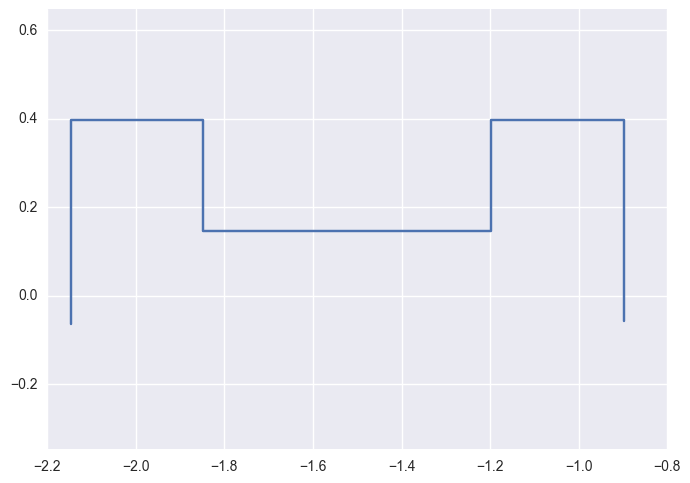

In [13]:
x = [v[0] for v in vertex_numbers]
y = [v[1] for v in vertex_numbers]

plt.clf()
plt.plot(x, y)
plt.axes().set_aspect('equal', 'datalim')

plt.gcf()


This geometry looks just like the one I have drawn in popupcad so all good! Now lets look into the constraint system. 

In [14]:
d.sketches[topteeth_key].constraintsystem.constraints

So we can see that I have put a bunch of constraints in this sketch to place the geometry. The `YDistanceConstraint` is very important here, because I explicitly put it in to programmaticaly vary this geometric feature and auto generate the cut files. We can access the constraint equations to take a look under the hood like so. 

In [15]:
# lets programmatically select the Y distance constraint
constraint_names = [c.name for c in d.sketches[topteeth_key].constraintsystem.constraints]
pprint(constraint_names)

idx = [i for i, c in enumerate(constraint_names) if c == 'Y Distance']
idx = idx[0] # just worry about one for now

d.sketches[topteeth_key].constraintsystem.constraints[idx].value

['Horizontal',
 'Vertical',
 'Vertical',
 'Vertical',
 'Vertical',
 'Fixed',
 'Y Distance']


0.25

The `Y distance` constraint value is the one I would like to programmatically change. Very quickly, lets see what else in the constraint system we can access. Below shows the system of equations that are solved, with the last equation being the `Y distance` constraint 

In [49]:
d.sketches[topteeth_key].constraintsystem.generator.equations

[-vertex4810252432_y + vertex4822604112_y,
 -vertex4810252432_y + vertex4822603664_y,
 -vertex4810252432_y + vertex4827372368_y,
 -vertex4810261904_x + vertex4822604112_x,
 -vertex4810252432_x + vertex4810281232_x,
 -vertex4810284752_x + vertex4827372368_x,
 -vertex4709941456_x + vertex4822603664_x,
 vertex4810284752_x + 1.84728564868934,
 vertex4810284752_y - 0.147163434903047,
 ((vertex4810284752_y - vertex4827372368_y)**2)**0.5 - 0.3]

The last constrain shows So now let's see how to vary this distance constraint and reprocess the operations. 

lets update the value and reprocess the constraints etc

In [16]:
d.sketches[topteeth_key].constraintsystem.constraints[idx].value = 0.3
# prove that it changed
d.sketches[topteeth_key].constraintsystem.constraints[idx].value

# now update the vertices based on the new constraints
d.sketches[topteeth_key].constraintsystem.update() # not working!
############### OK stopping here but am not sure how to get update to work 


In [71]:
d.sketches[topteeth_key].constraintsystem.cleanup()
del d.sketches[topteeth_key].constraintsystem.generator
d.sketches[topteeth_key].constraintsystem.update()

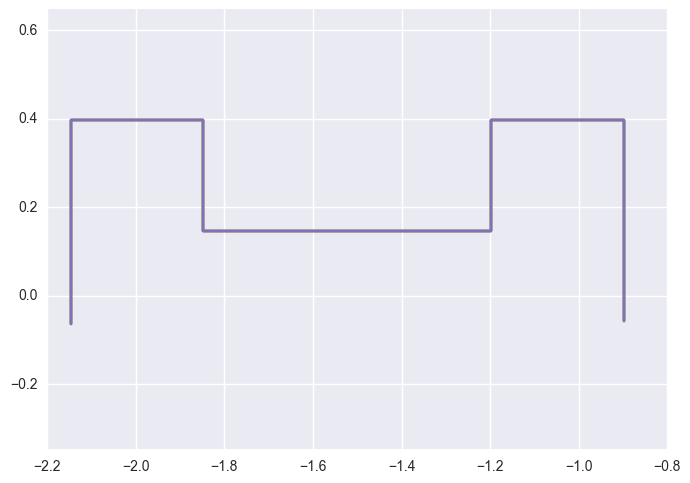

In [72]:
vertex_numbers = [v.getpos() for v in d.sketches[topteeth_key].operationgeometry[0].vertices()]
x = [v[0] for v in vertex_numbers]
y = [v[1] for v in vertex_numbers]

plt.plot(x, y)
plt.axes().set_aspect('equal', 'datalim')
plt.gcf()
